# 1. 라이브러리 불러오기

In [1]:
import warnings
warnings.filterwarnings("ignore")                        # 경고 무시   

import os                                                # os 라이브러리 불러오기


import pandas as pd                                      # pandas 불러오기
import numpy as np                                       # numpy 불러오기

# 결측치 확인 라이브러리 불러오기
import missingno as msno                                 # missingno 라이브러리의 matrix 함수를 사용하면, 데이터의 결측 상태 시각화

# 평가 함수를 만들기 위한 라이브러리 불러오기
from sklearn.model_selection import train_test_split     # 데이터셋 분리 라이브러리
from sklearn.metrics import mean_squared_error           # MSE 라이브러리 불러오기

# 교차 검증 라이브러리 불러오기
from sklearn.model_selection import KFold                # 교차검증에서 사용할 fold 개수 설정할 때 사용함 
from sklearn.model_selection import cross_val_score      # 모델의 트레이닝 데이터로 교차검증 점수 도출  5.2 참조

# 4가지 학습 모델 불러오기
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor                        
from lightgbm import LGBMRegressor

# 그래프 그리기 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 데이터 불러오기

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'        # 경로 설정 

train_data_path = os.path.join(data_dir, 'train.csv')                  # train 데이터셋 경로
test_data_path = os.path.join(data_dir, 'test.csv')                    # test 데이터셋 경로

train = pd.read_csv(train_data_path)                                   # train 데이터셋 불러오기
test = pd.read_csv(test_data_path)                                     # test데이터셋 불러오기

train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

# 3. 데이터 전처리

## 3.1 결측치 확인 

- 데이터에 결측치가 있는지를 확인<br>
- missingno 라이브러리의 matrix 함수를 사용하면, 데이터의 결측 상태를 시각화를 통해 살펴볼 수 있음

### 방법 1 : info()

In [3]:
# 결측치 확인
train.info()                           
test.info()                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

### 방법2 : missingno



<AxesSubplot:>

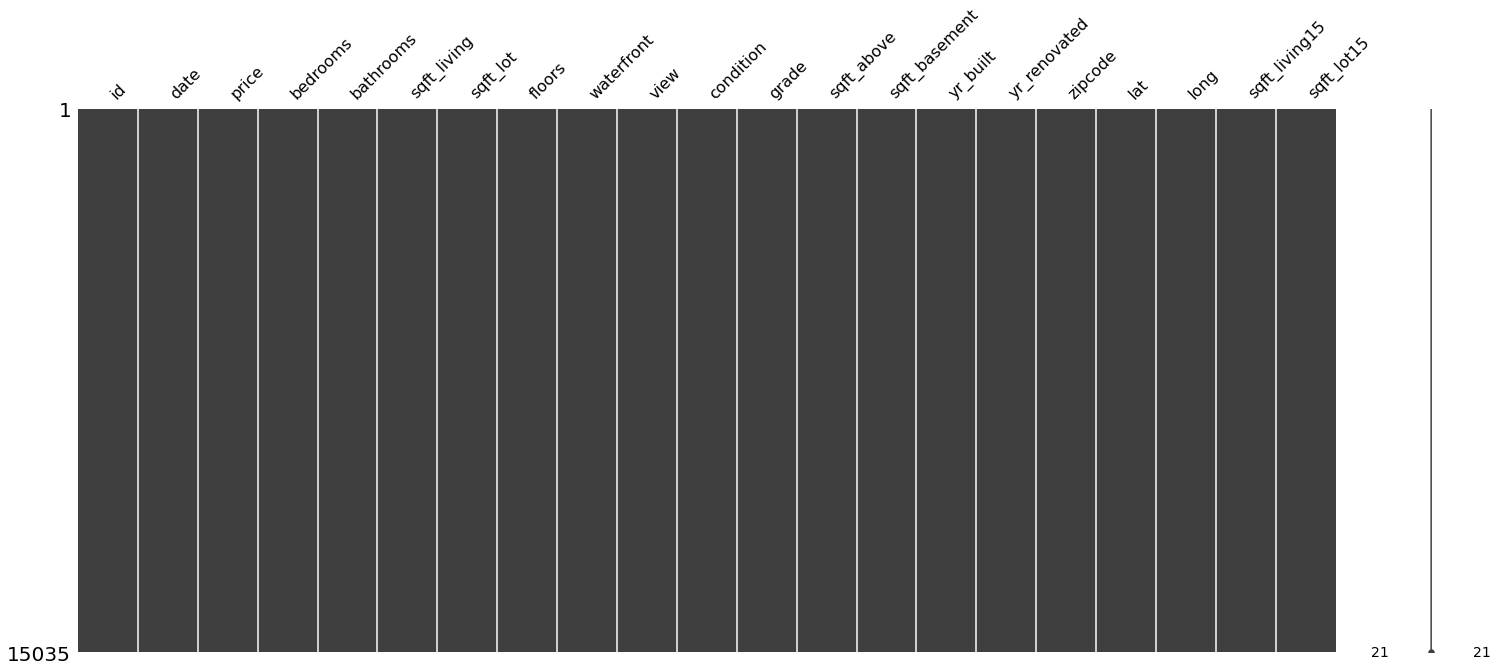

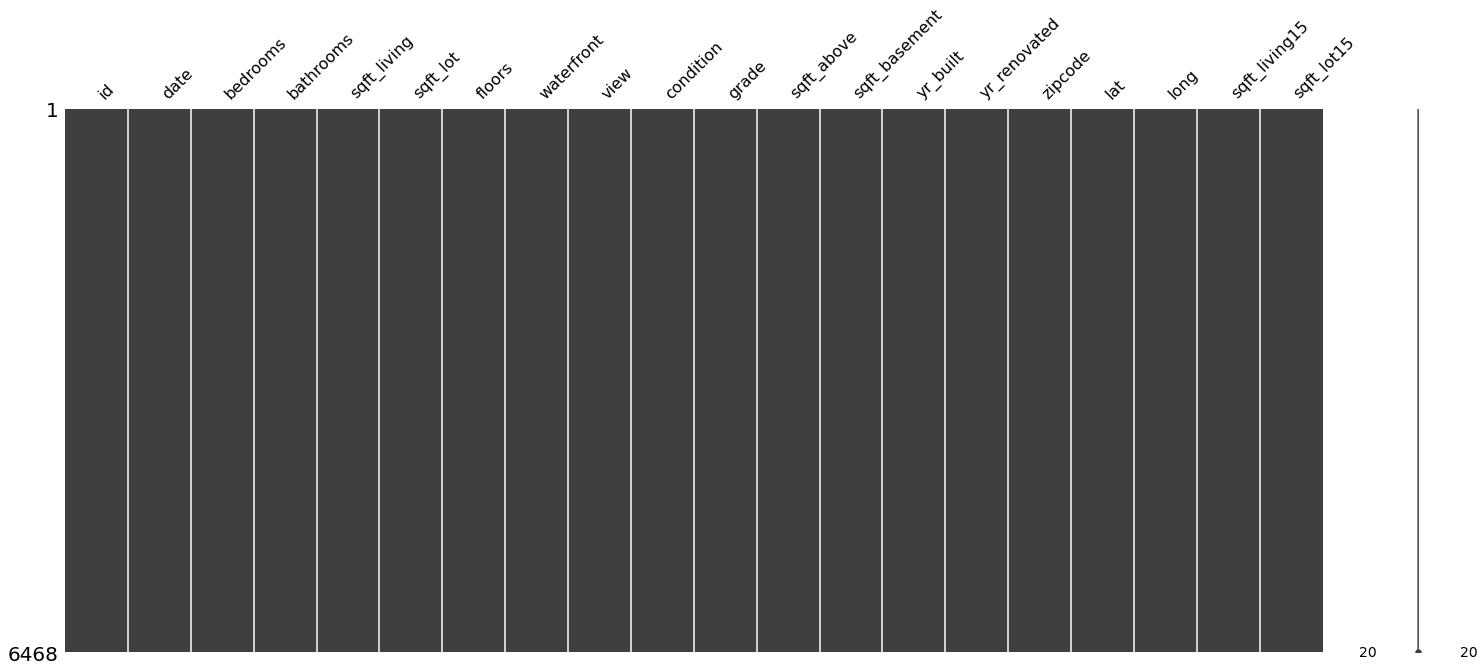

In [4]:
# missingno.matrix()를 이용하면 결측치를 시각화할 수 있음
# 결측치가 있으면 하얗게 나옴. 없으면 검정
msno.matrix(train)
msno.matrix(test)


### 방법 3 : isnull()

### train 결측치 확인

In [5]:
# 1. id 컬럼이 결측치인지 확인합니다.
null_check = pd.isnull(train['id'])

# 2. 결측치인 데이터만 뽑아냅니다.
null_data = train.loc[null_check, 'id']
null_data                                                        # 결측치가 없기 때문에 빈 데이터프레임만 나왔음        
 
# 3. 결측치인 데이터의 개수를 셉니다.
print('{} 컬럼 결측치: {} 개'.format('id', len(null_data.values)))  # 마지막으로 데이터 개수를 출력해주면 결측치 개수를 확인할 수 있네요.

# 4. 위의 과정을 한 번에
print('{} 컬럼 결측치: {} 개'.format('id', len(train.loc[pd.isnull(train['id']), 'id'].values)))

id 컬럼 결측치: 0 개
id 컬럼 결측치: 0 개


## 3.2 data(train + test) 데이터셋 전처리

In [6]:
# 제출할 때 예측 결과값을 합칠 test용 id 따로 저장
test_id = test['id']

# 정답지 price를 y변수에 빼놓기
y = train['price']
del train['price']

# id 삭제
del test['id']
del train['id']

# date 컬럼에서 month까지 슬라이싱하여 덮어씌우기
train['date'] = train['date'].apply(lambda i : i[:6]).astype(int)
test['date'] = test['date'].apply(lambda i : i[:6]).astype(int)

## 3.3 학습데이터와 테스트데이터 합치기
- 모델을 학습시키기 전에, 전체 데이터에 대해 탐색해보기 위해 두 데이터를 pd.concat으로 합침
- 물론, 모델 학습을 진행할 때에는 다시 분리해서 사용해야 하기 때문에 데이터를 합치기 전 train_len에 training data의 개수를 저장해서 추후에 학습데이터만 불러올 수 있는 인덱스로 사용

In [7]:
# 나중에 다시 train, test 데이터셋으로 분리할 때 test 데이터셋 첫번째 위치 지정하기 위해서 저장함
train_len = len(train)

# 두 데이터셋 합치기
data = pd.concat((train, test), axis=0)

print(len(data))
data.head()

21503


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


## 3.4 시각화 - 목적 : train, test 데이터셋 그래프 편향성 확인
- 모델을 학습시키기 전에, 전체 데이터에 대해 탐색해보기 위해 두 데이터를 pd.concat으로 합침


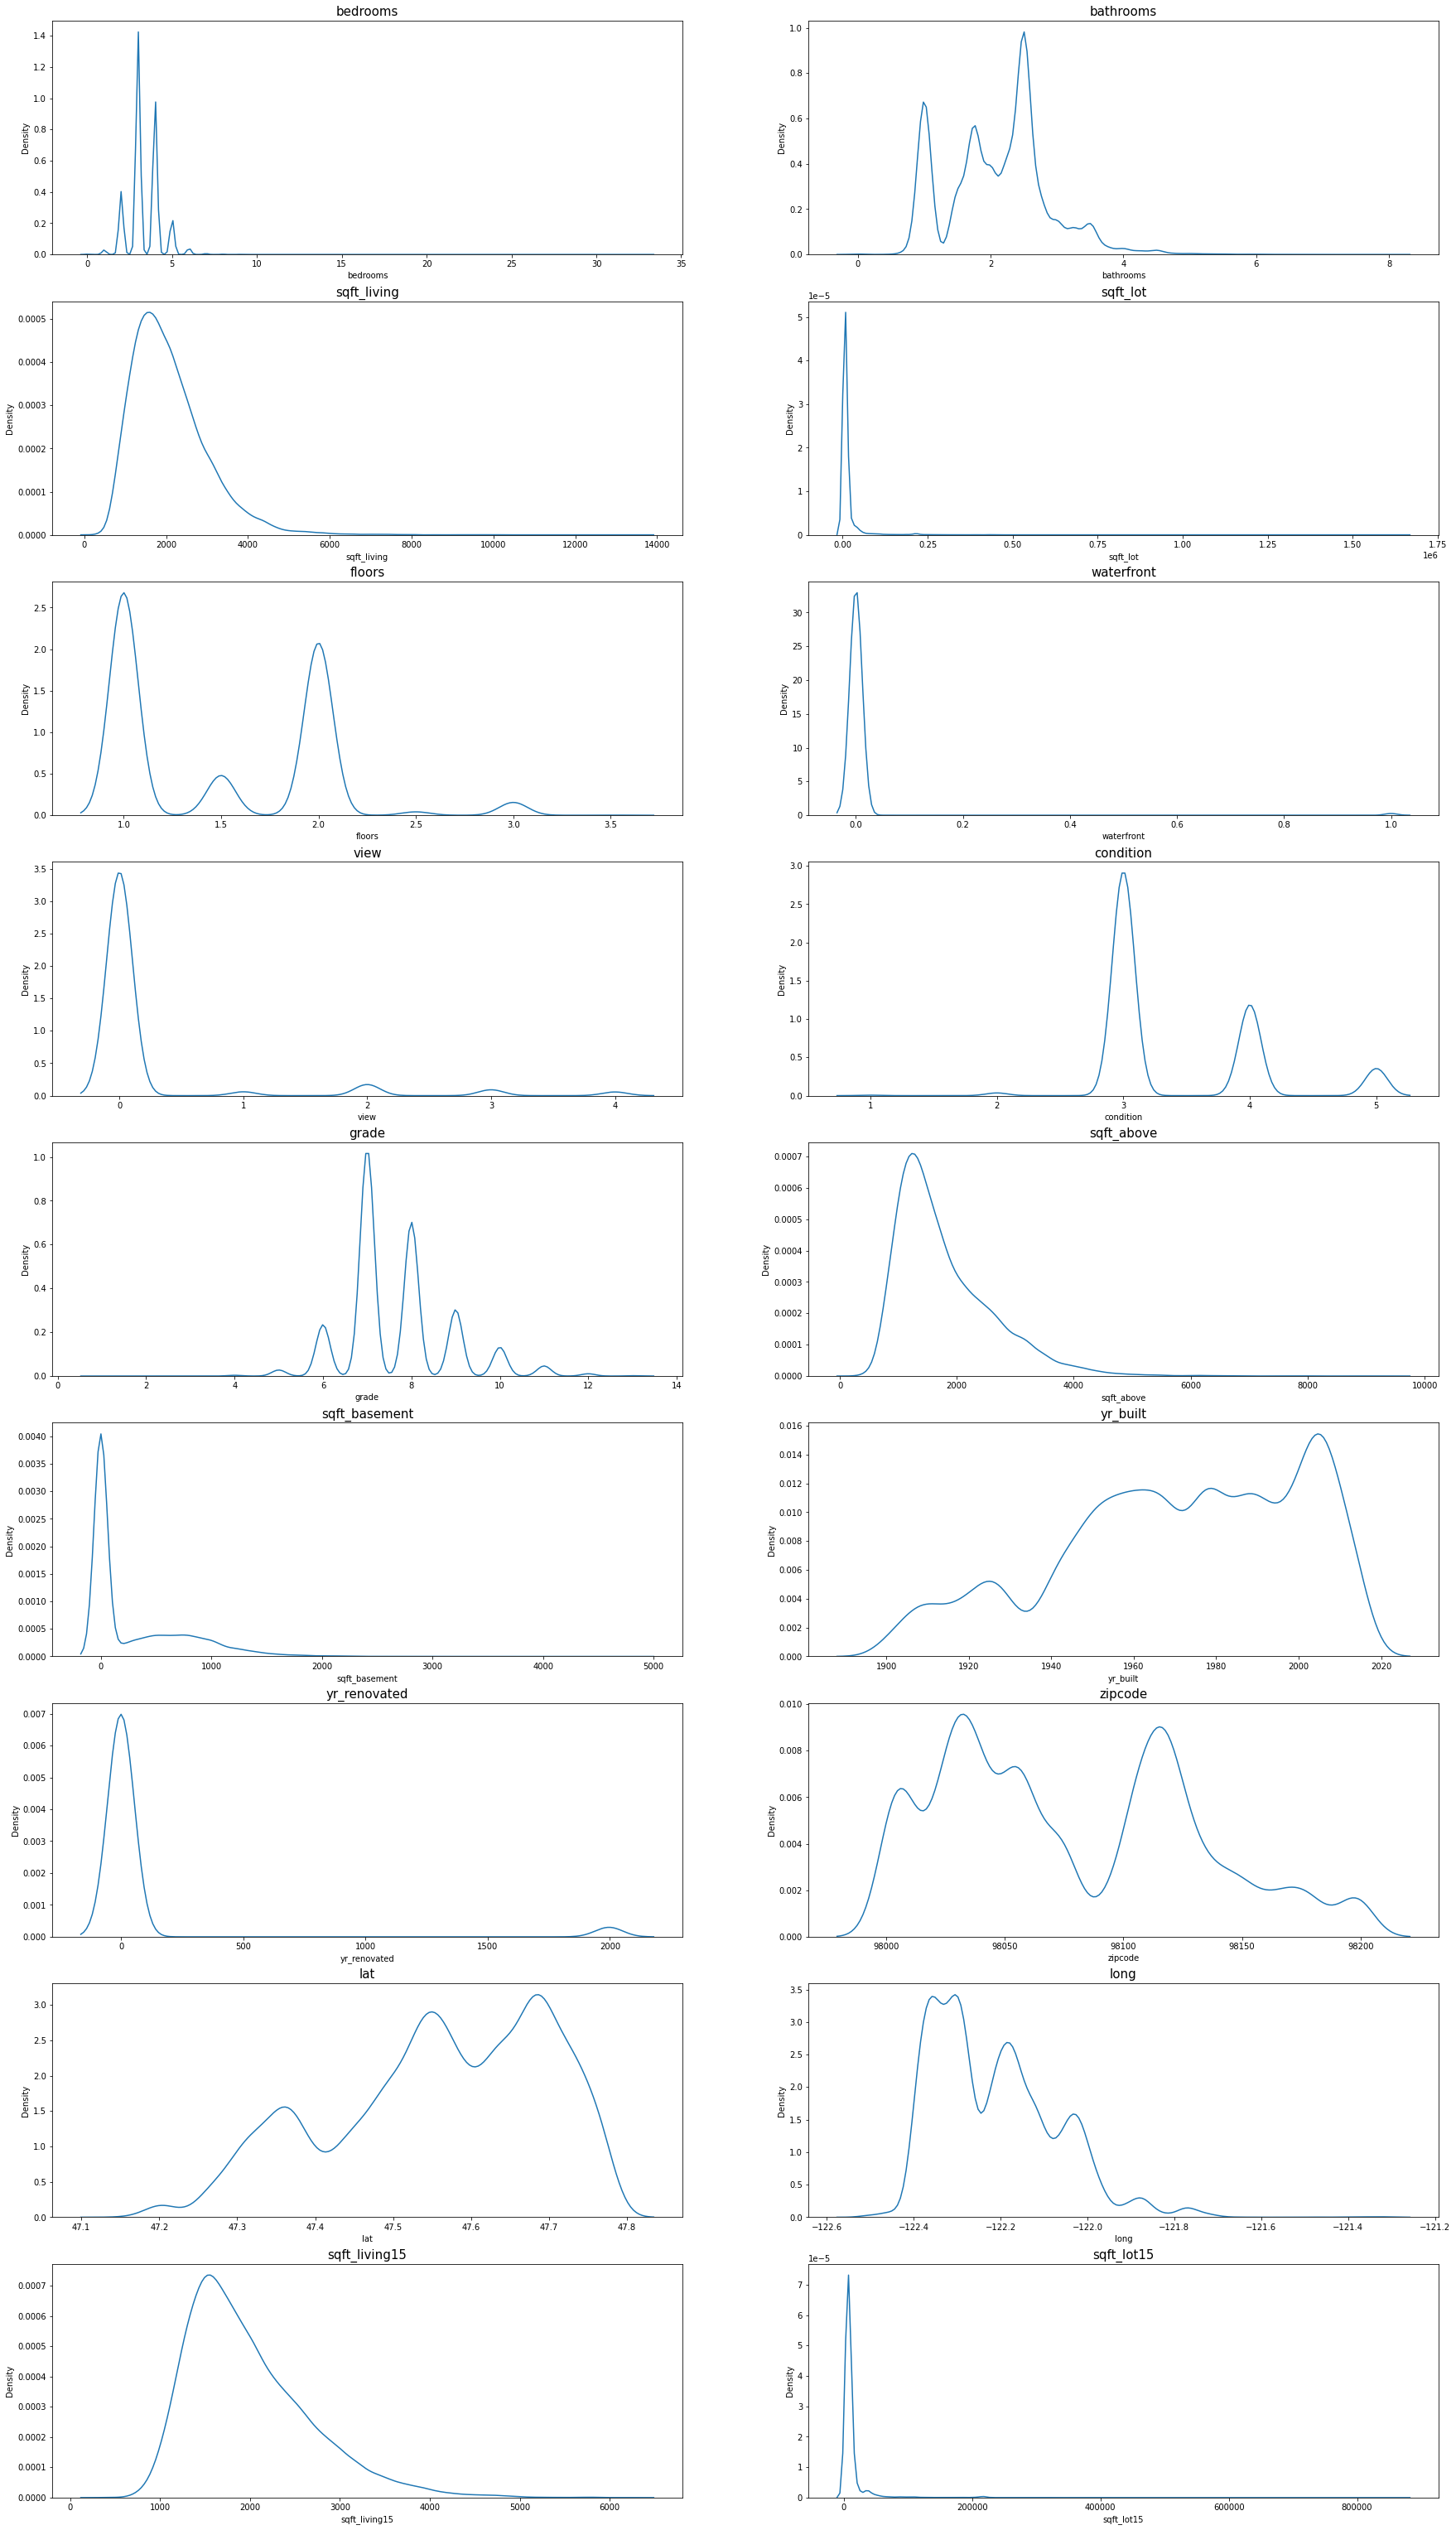

In [8]:
fig, ax = plt.subplots(9, 2, figsize=(30, 55))   

count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        if count == 19 :
            break
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])        # 확률밀도함수(KDE) 그래프
        ax[row][col].set_title(columns[count], fontsize=15)            # subplot의 각 행과 열을 지정하여 그래프 그리기
        count += 1

plt.show()

## 3.5. 로그변환(Log-Scaling)

- 로그 변환은 정규분포에 가깝게 만듦
- x축 값이 로그함수를 거치면 x축이 logx 스케일로 변경됨
- 로그는 1보다 큰 값은 작은 값으로 만들어 간격을 줄이고, 1보다 작은 값은 상대적으로 값이 크게하여 간격을 늘린다
- numpy.log1p() 로그변환 함수
    - 입력 배열의 각 요소에 대해 자연로그 log(1 + x)를 반환하는 함수  
    
### 3.5.1 로그변환 - data(train+test) 데이터셋 

In [9]:
# 편향된(skewed) 컬럼 데이터 리스트 생성
skewed_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

# train 데이터셋에서 치우쳐진 그래프를 그린 컬럼들을 로그 변환하기
# 각 컬럼 값에 log(x+1) 적용 
for col in skewed_columns:
    data[col] = np.log1p(data[col].values)

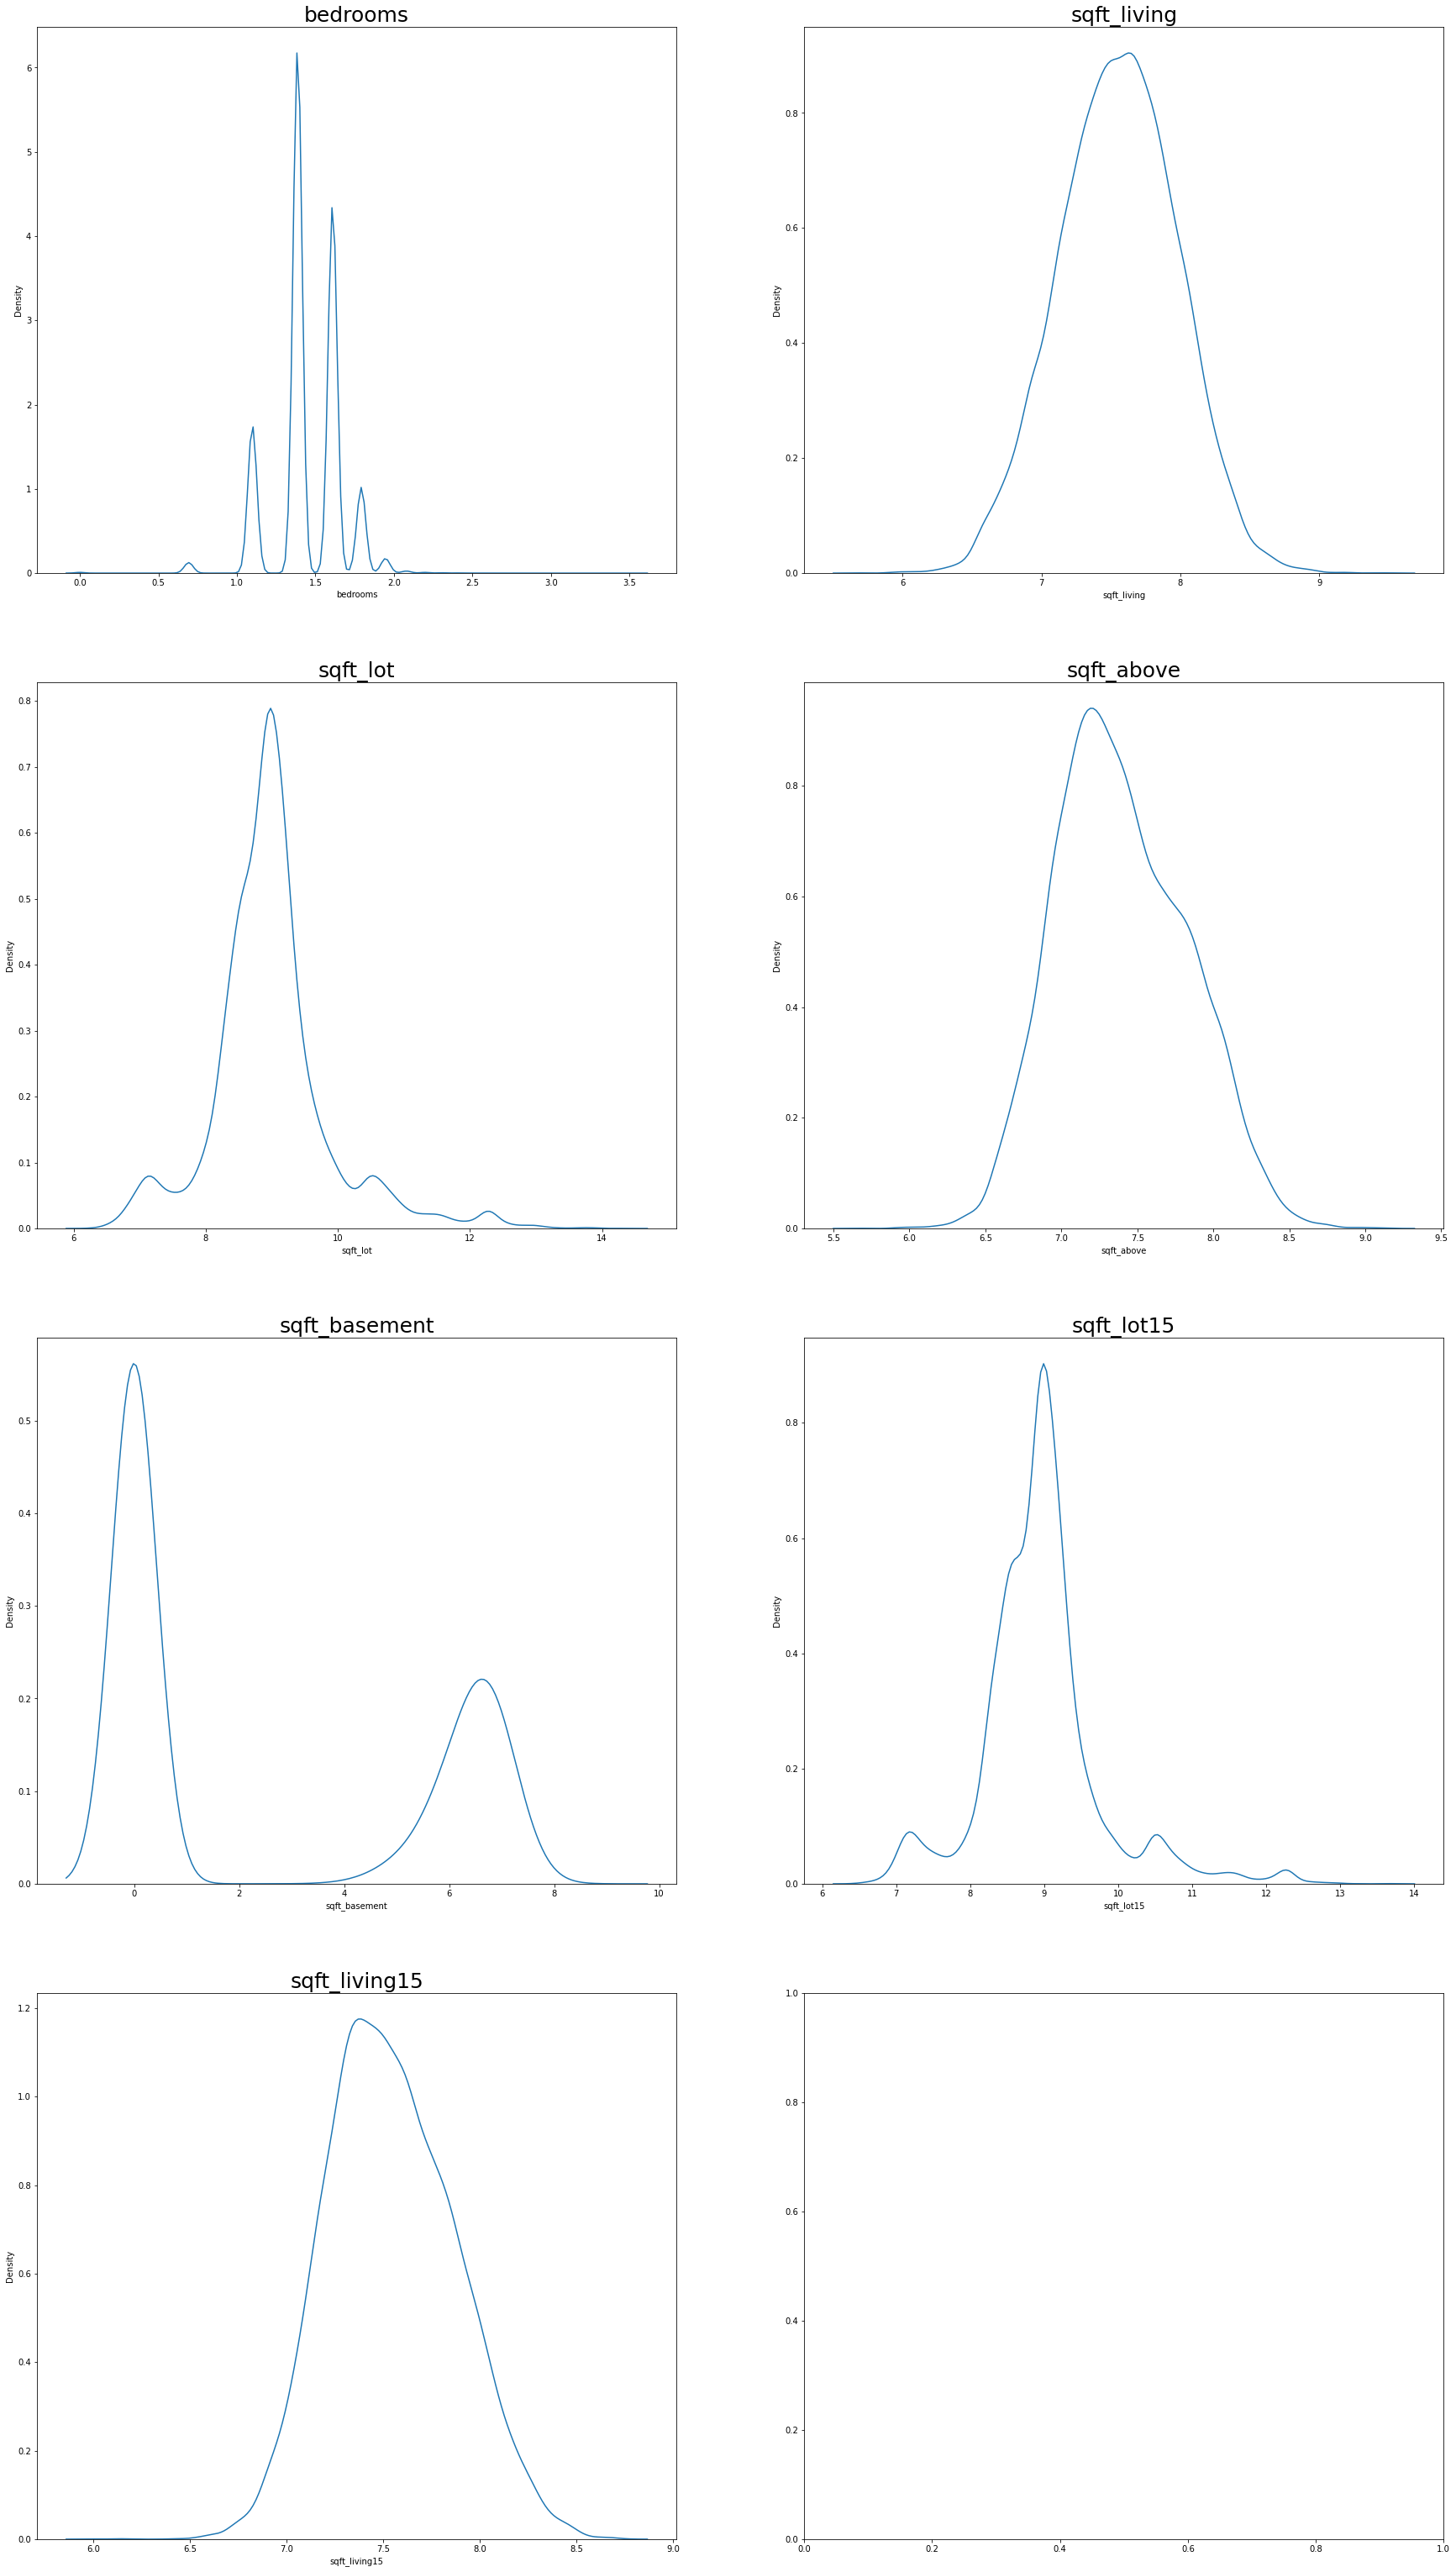

In [10]:
# 로그 변환후 그래프 확인하기
fig, axs = plt.subplots(4, 2, figsize=(30, 55))

# 로그 변환된 데이터 그래프 그리기
count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data=data[skewed_columns[count]], ax=axs[row][col])      # 확률밀도함수(KDE) 그래프
        axs[row][col].set_title(skewed_columns[count], fontsize=25)          # subplot의 각 행과 열을 지정하여 그래프 그리기
        count += 1  

plt.show()

### 3.5.2 로그변환 - 정답지인 price의 분포확인

In [11]:
# 확인용
y                # 정답지 price

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

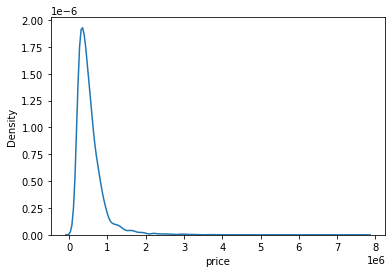

In [12]:
# Target(정답지)인 y를 KDE로 그려보기
sns.kdeplot(y)                           # price 데이터를 확률밀도함수(KDE)로 그리기
                                         # 단위는 백만
plt.show()

> 왼쪽으로 치우친 분포를 가짐

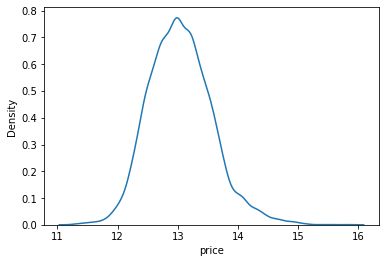

In [13]:
y_log = np.log1p(y)       # price 데이터를 로그변환

sns.kdeplot(y_log)        # 변환된 로그값 데이터를 확률밀도함수(KDE)로 그리기
plt.show()

> - 정규분포 형태로 변환됨  
> - x축은 로그 스케일

## 3.6 합쳤던 train, test 데이터셋을 다시 분리하기

In [14]:
train = data.iloc[:train_len, :]               # train_len은 train 데이터프레임 행 개수. 위 3.3에서 정의함
test = data.iloc[train_len:, :]

print(train.shape, test.shape)

(15035, 19) (6468, 19)


# 4. 모델 선정

- 학습시킬 모델 준비


## 4.1 학습 모델 준비

Blending할 모델 종류
1. GradientBoosting Regressor
2. XGB Regressor
3. LightGBM Regressor
4. Linear Regression

In [15]:
# 랜덤시드값 설정
random_state=2022 


# 각 모델 instance 생성하기
gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)


# 모델 instance들 리스트로 묶기
models = [gboost, xgboost, lightgbm, rdforest]


# 그리드 탐색기에 들어갈 하이퍼파라미터 종류
param_grid = {
    'n_estimators': [10, 100],                          
    'max_depth': [1, 10],
#     'learning_rate': [0.01, 0.05]              
}

## 4.2 RMSE 함수 정의


In [16]:
# 평가 척도 rmse 함수 생성
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))   # 로그값 복원을 위해 np.expm1 사용

## 4.3 손실값  RMSE  얼마나 될지에 대한 함수 정의

In [17]:
# 각 모델 RMSE 평가
def get_scores_rmse(models, train, y):
    df = {}                                                                                 # 빈 딕셔너리 생성 
    
    for model in models:
        model_name = model.__class__.__name__                                               # 모델의 이름 불러오기
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)  # RMSE를 위한 train, test데이터셋으로 분리
        model.fit(X_train, y_train)                                                         # 훈련 
        y_pred = model.predict(X_test)                                                      # 예측
        
        df[model_name] = rmse(y_test, y_pred)                                               # RMSE 평가
        
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)  # 전치행렬시키고 내림차순 정리
            
    return score_df

get_scores_rmse(models, train, y_log)

,RMSE
RandomForestRegressor,134929.744327
GradientBoostingRegressor,130363.559558
XGBRegressor,127900.254005
LGBMRegressor,120307.155358


> LGMBRegressor가 가장 낮은 RMSE를 도출함

## 4.4 Grid Search 함수 정의

In [18]:
from sklearn.model_selection import GridSearchCV

def my_GridSearch(model, train, y_log, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y_log)

    # 결과값 저장
    params = grid_model.cv_results_['params']                  # 그리드 모델의 n_estimator와 max_depth를 이용한 학습 결과
    score = grid_model.cv_results_['mean_test_score']          # 그리드 모델의 평균테스트점수 결과
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)                             # results 데이터프레임에 params 결과값 넣기
    results['score'] = score                                   # results 데이터프레임에 score 결과값 넣기
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])          # negated MSE의 결과값이 음수기 떄문에 -1을 곱함
    results.sort_values(by=['RMSLE'], inplace=True)            # RMSLE 기준으로 정렬

    return results.iloc[0].round(3)                            

## 4.5 Grid Search 하기 - n가지 모델에 대해 

In [19]:
def get_model_with_grid_search(models, train, y, param_grid, random_state=2022):
    df = {}
    for model in models:
        model_name = model.__class__.__name__                        # 모델 이름 획득
        
        df[model_name] = my_GridSearch(model, train, y, param_grid)  # 딕셔너리에 RMSLE 값 넣기
        
    model_df = pd.DataFrame(df)
    return model_df

get_model_with_grid_search(models, train, y, param_grid, random_state=2022)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warni

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,RandomForestRegressor
max_depth,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
n_estimators,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
score,-1.707729e+10,-1.793226e+10,-1.636420e+10,-1.951197e+10
RMSLE,1.306801e+05,1.339114e+05,1.279226e+05,1.396853e+05


## 5. 그리드 탐색으로 얻은 결과값을 모델에 넣어서 어떤지 평가해보기

### LightGMB Regressor

In [20]:
# 모델 선택과 최적 하이퍼파라미터 인자 입력
model = LGBMRegressor(max_depth=5, n_estimators=100, random_state=random_state)

# 학습
model.fit(train, y_log)

# 예측
y_pred = model.predict(test)

# 평가
y_pred_eval = model.predict(train)
rmse(y_log, y_pred_eval)

102531.6018777429

### XGBRegressor

In [21]:
# 모델 선택과 최적 하이퍼파라미터 인자 입력
model = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.05, random_state=random_state)
# 학습
model.fit(train, y_log)

# 예측
y_pred = model.predict(test)

# 평가
y_pred_eval = model.predict(train)
rmse(y_log, y_pred_eval)

112683.03851241453

### GradientBoostingRegressor

In [22]:
# 모델 선택과 최적 하이퍼파라미터 인자 입력
model = GradientBoostingRegressor(max_depth=10, n_estimators=100, learning_rate=0.05, random_state=random_state)
# 학습
model.fit(train, y_log)

# 예측
y_pred = model.predict(test)

# 평가
y_pred_eval = model.predict(train)
rmse(y_log, y_pred_eval)

39034.82562162102

### RandomForestRegressor

In [23]:
# 모델 선택과 최적 하이퍼파라미터 인자 입력
model = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=random_state)
# 학습
model.fit(train, y_log)

# 예측
y_pred = model.predict(test)

# 평가
y_pred_eval = model.predict(train)
rmse(y_log, y_pred_eval)


96791.54736690593

> stage 5는 그리드 탐색으로 얻는 하이퍼파라미터를 찾고 각 모델에 넣어서 어떤지 평가해보는 단계였다.  
다음 stage 6에서는 앙상블로 예측값을 도출할 것이다

그러나 탐색적 그리드가 너무 오래걸려서 여러 경우의 수에 대해 측정할 수가 없었다. 그래서 다음 스테이지 6은 아무 숫자를 넣어서 가장 좋은 하이퍼파라미터를 찾아볼 것이다

## 6. 앙상블 - AveragingBlending

앙상블 선택
- 분류는 보팅
- 회귀는 평균

이 프로젝트는 회귀문제이므로 평균인 AveragingBlending 기법을 사용할 것이다

### Bleding
- 개별 모델을 사용하는 것이 아니라 다양한 여러 모델을 종합하여 결과를 얻는 기법  
- **앙상블** 기법이라고도 함


### Average Blending
- 여러가지 모델의 결과를 **산술 평균**을 통해 Blending 함  
- 평균의 결과값이 올바르려면 어느 하나의 값이 많이 떨어져서는 안된다. 즉, 평균값을 오염시키는 모델 성능값은 빼야함

## 6.1 블랭딩하기 위해 하이퍼파라미터 설정한 regressor 객체 생성 

In [24]:
# instance 생성하기
# gboost = GradientBoostingRegressor(max_depth=10, n_estimators=9000, random_state=2022)
# xgboost = XGBRegressor(bjective='regression', max_depth=10, n_estimators=10000, learning_rate=0.007, random_state=2022)
lightgbm = LGBMRegressor(objective='regression', max_depth=10, n_estimators=10000, learning_rate=0.007, random_state=2022)
# rdforest = RandomForestRegressor(max_depth=5, n_estimators=5000, random_state=2022)


# 모델 instance들 리스트로 묶기
# models = [gboost, xgboost, lightgbm, rdforest]
models = [lightgbm]

> 처음에는 4가지 모델로 AveragingBleding을 구동시켰으나 캐글 점수가 좋지 않아 3개, 2개, 마지막 1개로 돌려보았을 때 가장 좋은 예측을 할 수 있었습니다
따라서 이 프로젝트에서는 XGBRegressor의 가벼운 버전인 LightGBMRegressor을 모델로 선정하고 결론을 도출했습니다.


## 6.2 AveragingBlending 함수 정의

In [25]:
def AveragingBlending(models, x, y_log, test_x):
    # 모델 학습
    for m in models :                                                 # 모델 객체(instance)들 하나씩 꺼내오기
        m.fit(x.values, y_log)                                        # n개 모델 학습
    
    # 모델 예측(테스트 데이터로) - 리스트컴프리헨션을 사용했음
    predictions = np.column_stack([
        m.predict(test_x.values) for m in models                      # 각 모델 예측 후 컬럼 열로 스택 쌓음
    ])
    

    # 모델들의 예측값들을 평균냄
    return np.mean(predictions, axis=1)                              # 컬럼으로 나열되 있는 데이터 값들을 가로 방향으로 평균냄

In [ ]:
y_pred = AveragingBlending(models, train, y_log, test)              # 여러 모델들의 결과값을 블렌딩(평균)하기 위한 함수
y_pred                                                              # 여러 모델들의 결과값이 전체 n모델의 결과의 평균값이 곧 예측값이다

## 6. 로그 변환 복원
np.expm1()으로 로그값을 원래 값으로 복원
- 로그로 변환했었으니 다시 원복시킨다는 것임

In [ ]:
y_pred = np.expm1(y_pred)
y_pred

# 7. 제출

In [ ]:
# submission 파일 만들기
submission = pd.DataFrame(test_id)

submission['Price'] = y_pred
submission

In [ ]:
# 파일 저장
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

# 8. 케글 점수

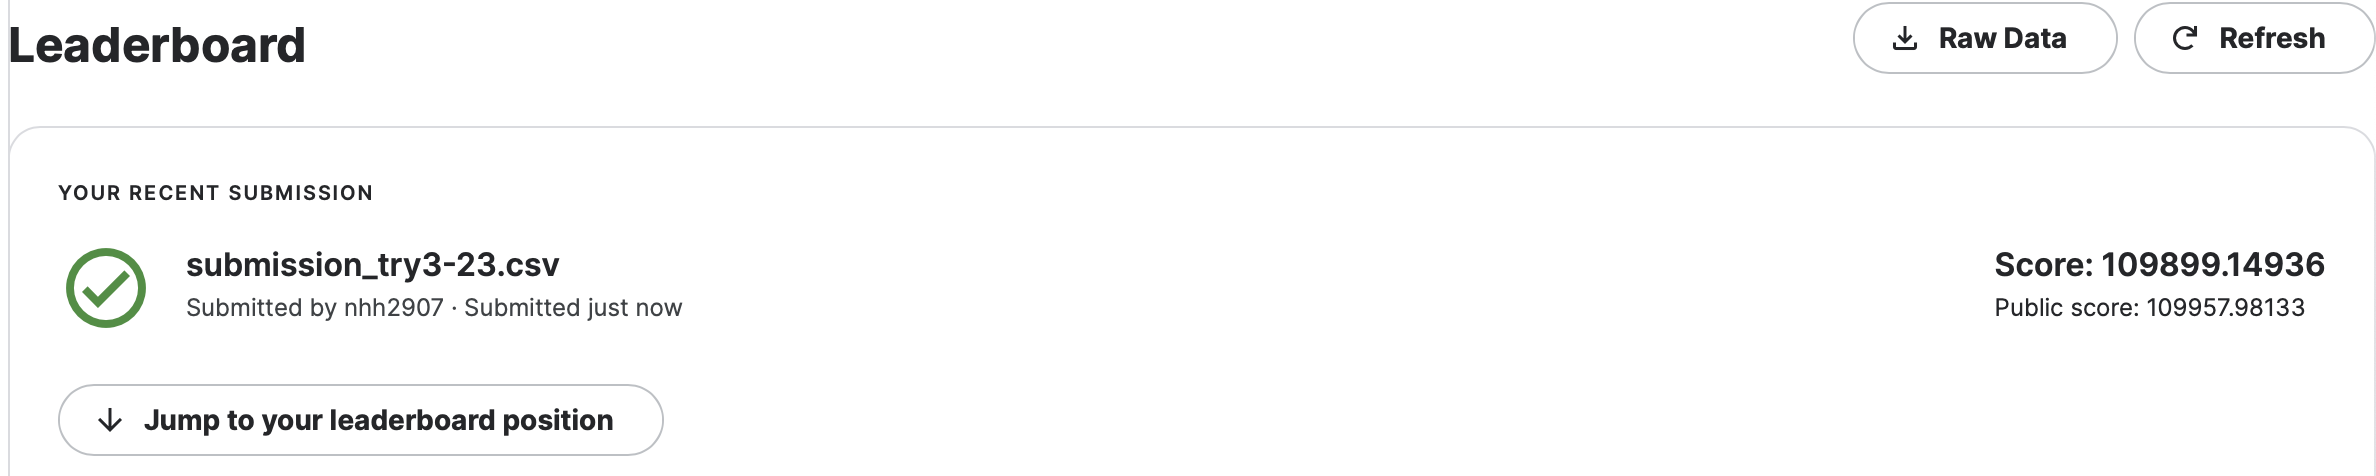

# 9. 회고

1. 이번 프로젝트에서 어려웠던 점 
   - 노드를 따라하다가 전체 흐름은 이해했으나 중가중간 관계를 이해하지 못하여 프로젝트 진행하는데 어려웠습니다
   - 그리드 탐색으로 최적의 하이퍼파라미터를 구하려는데 찾을 값의 범위를 늘리면 그리드 탐색의 시간이 너무 오래 걸려서 실질적으로 진행이 어려웠습니다
   - 따라서 임의수를 무작정 넣어보고 케글 점수를 높여야 했기에 힘들었습니다
    
2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
   - 하이퍼파라미터 개념
   - 치우친 그래프의 로그변환의 중요성

3. 루브릭 평가 지표를 맞추기 위해 시도한 것들
   - 결측치 확인 방법과 처리 방법 확인하기
   - 그리드 탐색에 필요한 최적의 인자들 찾기
   - 케글 제출과 점수 기준 충족
   - 최적화 진행을 진행함
   - 블랜딩 앙상블 기법을 적용해봄
    
4. 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정  
    - 달성함

    
5. 자기 다짐
     - 이번 노드는 가장 많은 시간을 투자했다. 그리드 탐색에 필요한 컴퓨팅 자원이 부족했고 한 번 클릭에 20분에서 많게는 2시간까지 기다려서 결과값을 얻었다. 그리드 탐색에 많은 인자값을 넣지 못했기 때문에 최적의 하이퍼파라미터를 얻었다고 결론을 내릴 수가 없었고 모델 평가를 해도 RMSE를 충분히 낮추기가 힘들었다. 이런 프로젝트에서는 흐름과 로직을 구체적으로 구성하고 실행 한 번 한 번이 중요하므로 실행 전에 신중하게 검토를 해야겠다

    

